In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
%matplotlib inline

In [5]:
%pwd

'C:\\Users\\Aaron\\Documents\\ds'

In [6]:
housing = pd.read_csv('USA_Housing.csv')

In [7]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [10]:
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [11]:
housing = housing.drop('Address', axis=1)

In [14]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


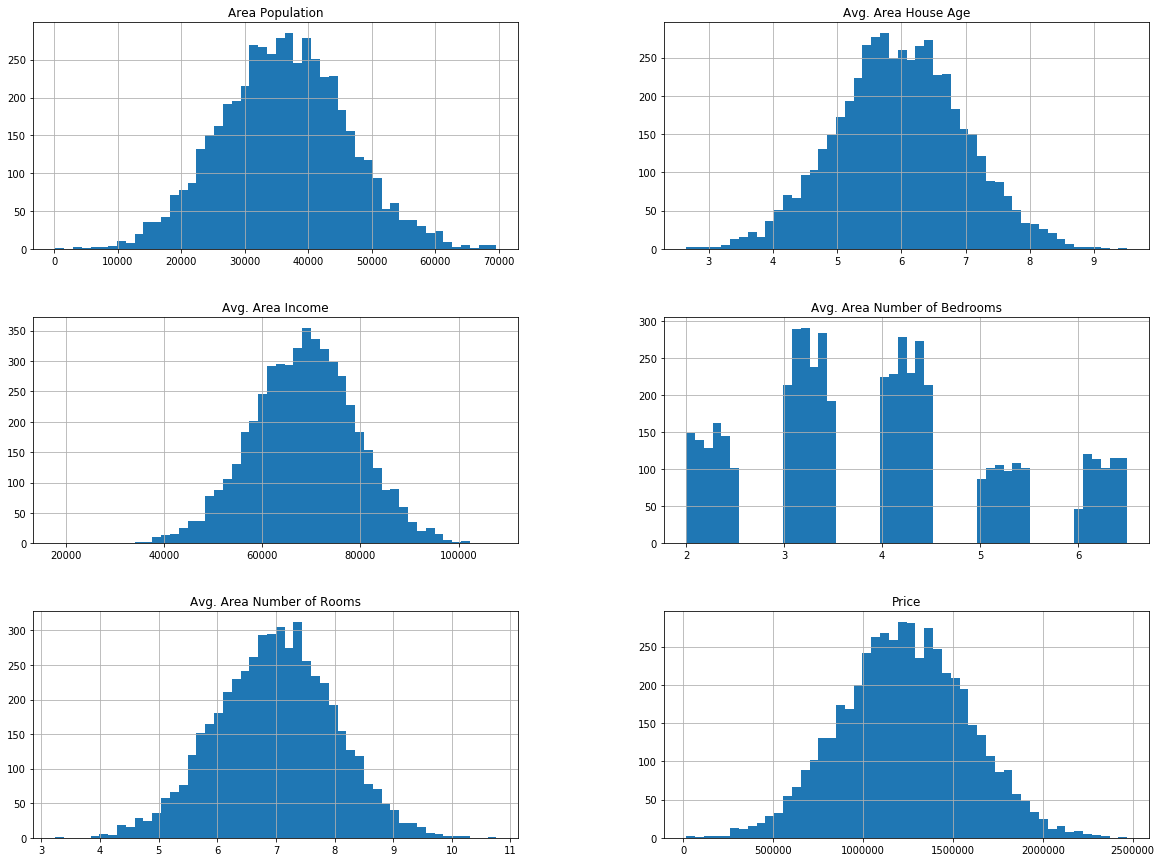

In [12]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
corr_matrix = housing.corr()

In [14]:
corr_matrix

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B3E08656A0>,
      dtype=object)

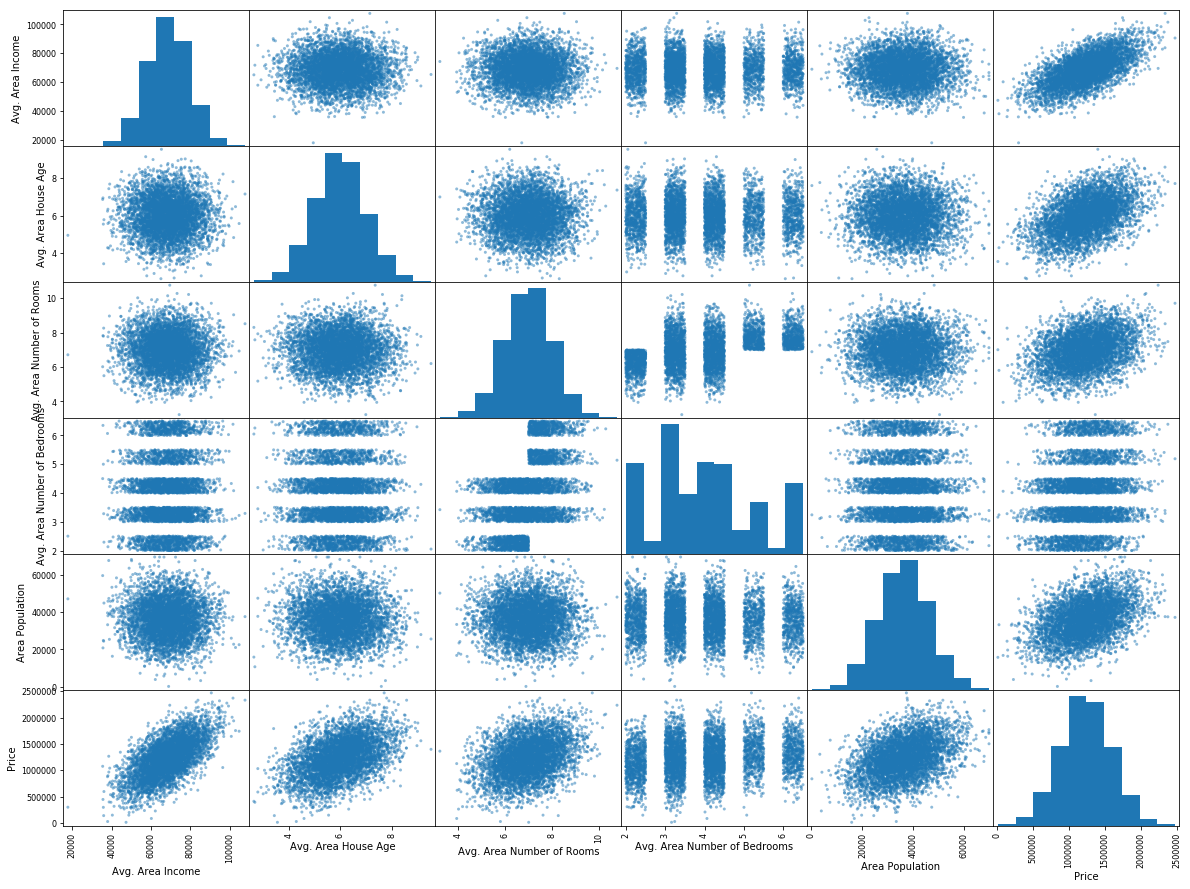

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing, figsize=(20,15))

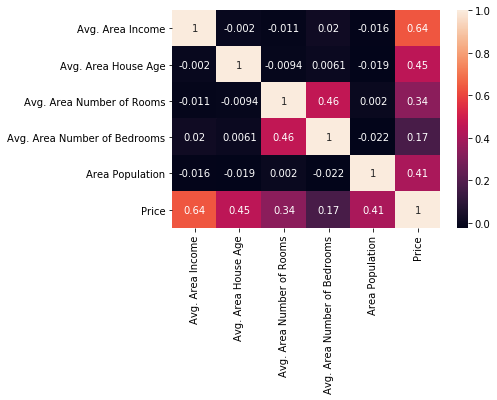

In [16]:
# More visual view of our correlation matrix
sns.heatmap(corr_matrix, annot=True)

C:\Users\Aaron\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


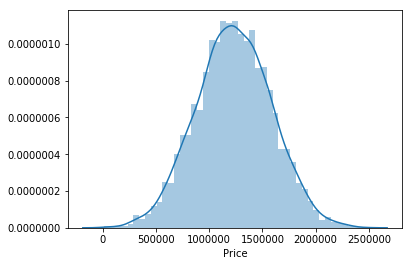

In [17]:
# Lets look at our target label and its distribution
sns.distplot(housing['Price'])

In [18]:
# We want to predict the price label
X = housing.drop('Price', axis=1)
y = housing['Price']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [55]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
lm.intercept_

-2635072.90093121

In [60]:
lm.coef_

array([2.16522058e+01, 1.64666481e+05, 1.19624012e+05, 2.44037761e+03,
       1.52703134e+01])

In [65]:
score = lm.score(X_train, y_train)
print(score)

0.9179787435623722


In [66]:
predictions = lm.predict(X_test)
predictions

array([1308587.92699714, 1237037.22949391, 1243429.34030722,
       1228900.21360437, 1063320.90710747, 1544058.05034817,
       1094774.70493034,  833284.72339249,  788412.85578756,
       1469714.86615696,  671728.43662092, 1606818.21977767,
       1004166.61331046, 1796798.97595973, 1288566.96220949,
       1087782.93301086, 1423072.3749249 , 1078178.68169646,
        802286.03537917,  930761.03695739, 1134829.86477803,
        916398.42023083, 1489972.69335353, 1284580.15538841,
       1582071.35322685, 1132519.15992002, 1089888.39644489,
        974510.51872177,  924057.96820804, 1740759.72092213,
       1286481.59512379, 1621289.95171618, 1435264.20161695,
       1234014.77924529, 1485434.5730037 , 1718335.00753592,
       1538953.74882758,  777106.64791831, 1765201.52243597,
       1175972.14199831, 1553707.94323478,  897703.67505165,
       1371049.803266  ,  845281.72310351, 1201022.89803856,
       1133285.98450789, 1363128.14557396, 1449814.0876822 ,
       1574363.90467323,

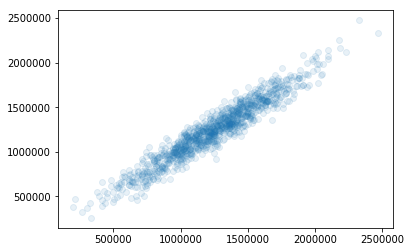

In [67]:
plt.scatter(y_test, predictions, alpha=0.1)
plt.show()